**The following code was run to time mx assign**


`cd /home/cellatlas/simdata/splatter_simulations/vanilla_splatter/deprob_20`

`for n in 1000 2000 4000 8000`

`do`

`d=${n}_8/15/mx ; echo $d`

`time mx assign -g $d/groups.txt -gi $d/extract_genes.txt -bi $d/clean_barcodes.txt -e $d/ec.txt -o $d/rank/time_test.tsv $d/rank.mtx`

`done`





**The following code was run to time Cellassign**

`for n in 1000 2000 4000 8000`

`do`

`d=/home/cellatlas/simdata/splatter_simulations/vanilla_splatter/deprob_20/${n}_8; echo $d
time python /home/cellatlas/simdata/code/cellassign.py $d`

`done`

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

In [2]:
mx_times_1 = [1.65, 2.152, 2.672, 3.738]
mx_times_2 = [1.47, 1.914, 2.571, 3.674]
mx_times_3 = [1.415, 1.945, 2.513, 3.823]
ca_times_1 = [168, 341, 657, 1231]
ca_times_2 = [168,317, 620, 1265]
ca_times_3 = [160,325, 624, 1290 ]

no_cells = [1000, 2000, 4000, 8000]

In [3]:
results = []
for m1, m2, m3, c1, c2, c3, nc in zip(mx_times_1, mx_times_2, mx_times_3, ca_times_1, ca_times_2, ca_times_3, no_cells):
    results.append([m1/60, 'mx', nc])
    results.append([m2/60, 'mx', nc])
    results.append([m3/60, 'mx', nc])
    results.append([c1/60, 'ca', nc])
    results.append([c2/60, 'ca', nc])
    results.append([c3/60, 'ca', nc])    

In [4]:
results_df = pd.DataFrame(results)
results_df.columns = ['time', 'assignment', 'no_cells']

In [5]:
results_df_seconds = results_df.copy()
results_df_seconds['time'] = results_df_seconds['time'] * 60

Text(0.5, 0, 'number cells')

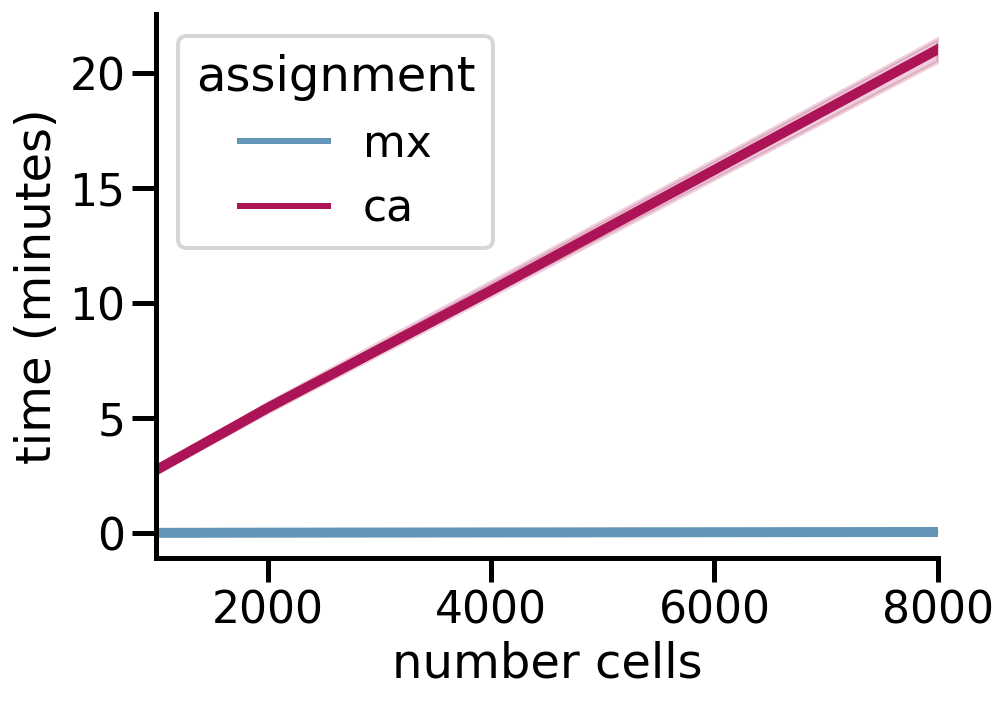

In [6]:
sns.set_context('poster')
fig, ax = plt.subplots(figsize = (7, 5))
sns.lineplot(linewidth = 5, data = results_df, x = 'no_cells', y = 'time', hue = 'assignment', palette = ['#6395B6', "#AD1457"])
sns.despine()
ax.set_xlim(1000, 8000)
ax.set_ylabel('time (minutes)')
ax.set_xlabel('number cells')

In [7]:
!pwd

/home/cellatlas/tech-paper/BGP_2024/notebooks


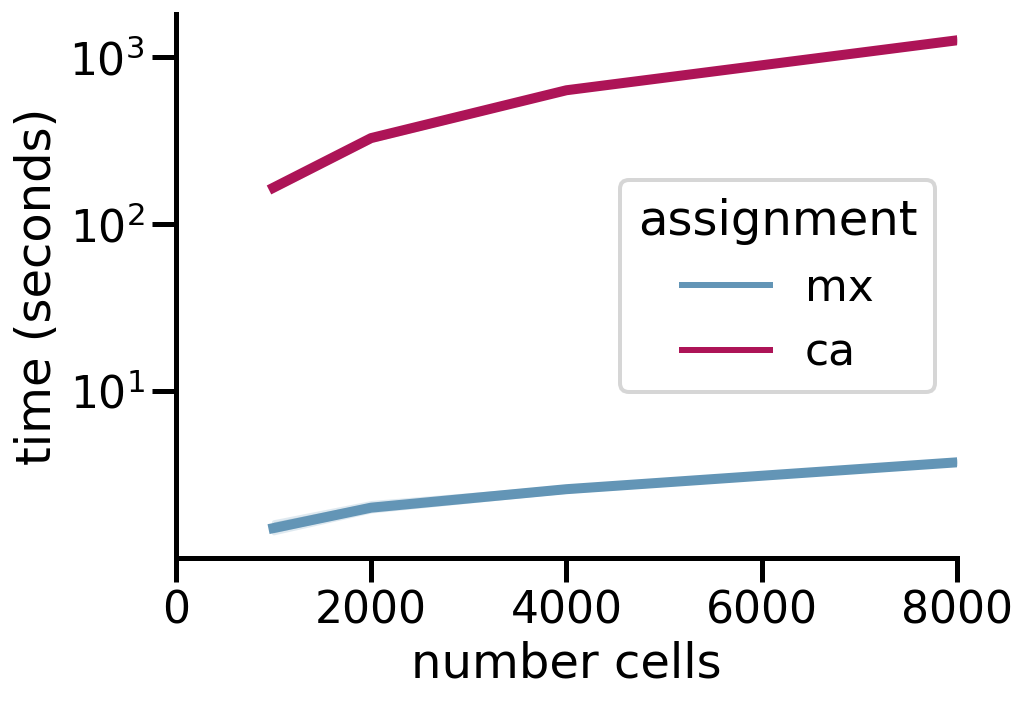

In [8]:
sns.set_context('poster')
fig, ax = plt.subplots(figsize = (7, 5))
sns.lineplot(linewidth = 5, data = results_df_seconds, x = 'no_cells', y = 'time', hue = 'assignment', palette = ['#6395B6', "#AD1457"])
sns.despine()
ax.set_xlim(0, 8000)
ax.set_ylabel('time (seconds)')
ax.set_xlabel('number cells')
ax.set_yscale('log')
plt.minorticks_off()
# plt.savefig('time_benchmark_mx_ca.pdf')

Text(0.5, 0, 'number cells')

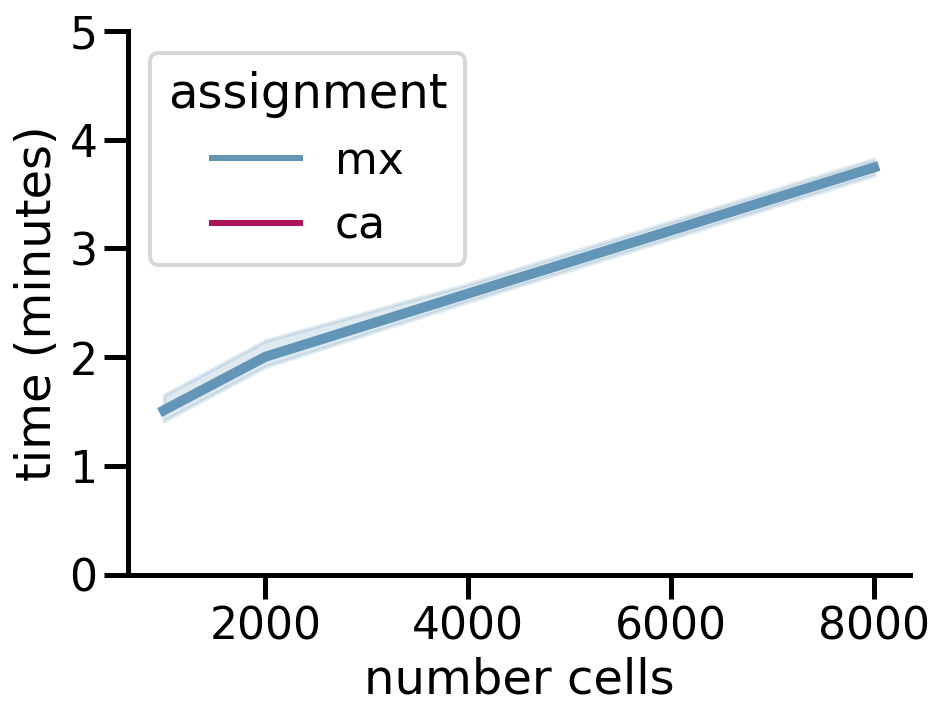

In [9]:
sns.set_context('poster')
fig, ax = plt.subplots(figsize = (7, 5))
sns.lineplot(linewidth = 5, data = results_df_seconds, x = 'no_cells', y = 'time', hue = 'assignment', palette = ['#6395B6', "#AD1457"])
sns.despine()
ax.set_ylim(0, 5)
ax.set_ylabel('time (minutes)')
ax.set_xlabel('number cells')

Text(0.5, 0, 'number cells')

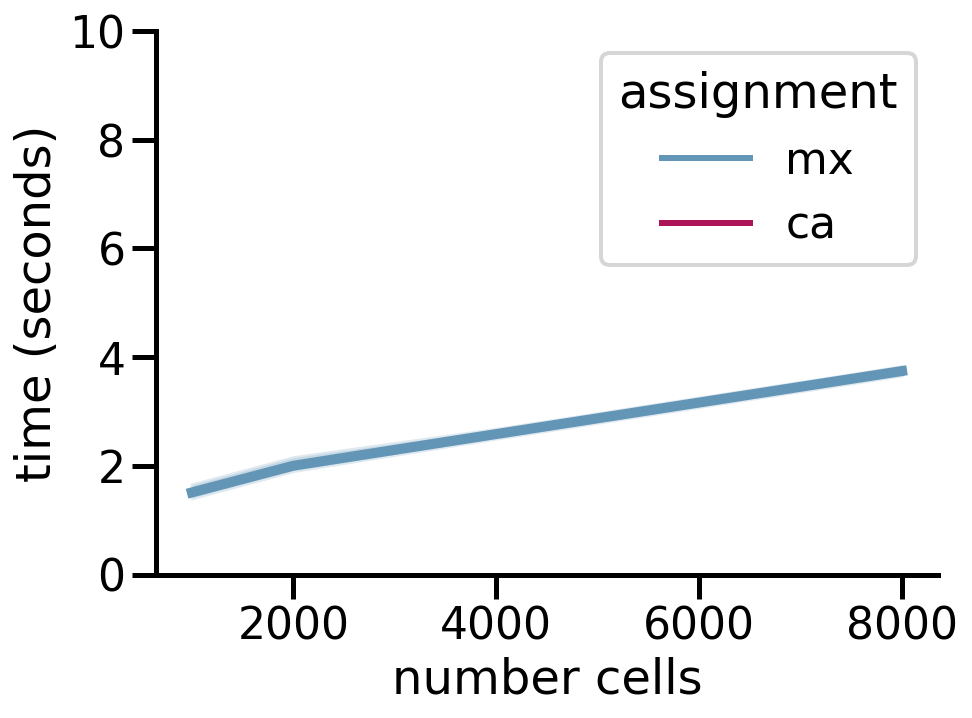

In [10]:
sns.set_context('poster')
fig, ax = plt.subplots(figsize = (7, 5))
sns.lineplot(linewidth = 5, data = results_df_seconds, x = 'no_cells', y = 'time', hue = 'assignment', palette = ['#6395B6', "#AD1457"])
sns.despine()
ax.set_ylim(0,10)
ax.set_ylabel('time (seconds)')
ax.set_xlabel('number cells')